In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data = pd.read_csv("/content/PQM_FACTORS.csv")

features = data.columns.difference(['Seriousness'])
X = data[features]
Y = pd.get_dummies(data["Seriousness"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.45))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.45))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), verbose = True)

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(np.array(y_test), axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Epoch 1/1000
38/38 [==============================] - 3s 28ms/step - loss: 2.3031 - accuracy: 0.0925 - val_loss: 2.3033 - val_accuracy: 0.0983
Epoch 2/1000
38/38 [==============================] - 1s 21ms/step - loss: 2.3033 - accuracy: 0.1013 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 3/1000
38/38 [==============================] - 1s 22ms/step - loss: 2.3022 - accuracy: 0.0983 - val_loss: 2.3023 - val_accuracy: 0.0950
Epoch 4/1000
38/38 [==============================] - 1s 22ms/step - loss: 2.3016 - accuracy: 0.1017 - val_loss: 2.3020 - val_accuracy: 0.1117
Epoch 5/1000
38/38 [==============================] - 1s 22ms/step - loss: 2.3009 - accuracy: 0.1021 - val_loss: 2.2997 - val_accuracy: 0.0833
Epoch 6/1000
38/38 [==============================] - 1s 32ms/step - loss: 2.3011 - accuracy: 0.1117 - val_loss: 2.3017 - val_accuracy: 0.1000
Epoch 7/1000
38/38 [==============================] - 1s 33ms/step - loss: 2.2978 - accuracy: 0.1075 - val_loss: 2.2976 - val_accuracy: 0.1100

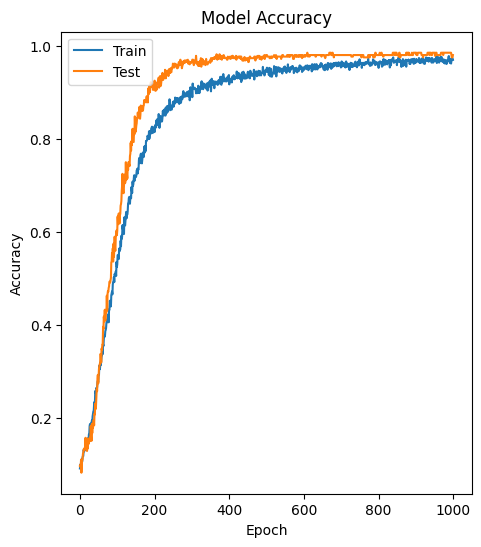

In [12]:
# Plot training history
plt.figure(figsize=(18, 6))

# Plot training & validation accuracy values
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

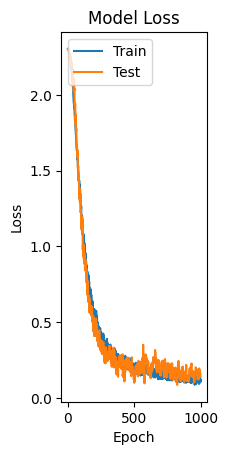

In [13]:
# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

19/19 [==============================] - 0s 4ms/step


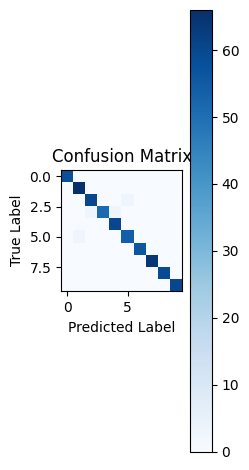

In [14]:
# Confusion Matrix
plt.subplot(1, 3, 3)
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test.values, axis=1), y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()